# Pairwise statistics

This notebook implements the needed functionality to calculate pair-wise residual based representations of geostatistical datasets. These functions will be used as a basis for variogram implementations.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path

PATH = Path('/content/drive/MyDrive/Geostatistics/content/data')

In [ ]:
import pandas as pd

data = pd.read_csv(PATH / 'precipitation_sums_2023-03-01.csv')
data

,station_id,start_date,end_date,latitude,longitude,height,name,state,geometry,value,quality
0,44,1971-03-01 00:00:00+00:00,2024-03-31 00:00:00+00:00,52.9336,8.2370,44.0,Großenkneten,Niedersachsen,POINT (8.237 52.9336),83.8,3.0
1,73,1952-07-01 00:00:00+00:00,2024-03-31 00:00:00+00:00,48.6183,13.0620,374.0,Aldersbach-Kramersepp,Bayern,POINT (13.062 48.6183),31.1,3.0
2,78,1961-01-01 00:00:00+00:00,2024-03-31 00:00:00+00:00,52.4853,7.9125,64.0,Alfhausen,Niedersachsen,POINT (7.9125 52.4853),92.3,3.0
3,91,1978-11-01 00:00:00+00:00,2024-03-31 00:00:00+00:00,50.7446,9.3450,304.0,Alsfeld-Eifa,Hessen,POINT (9.345 50.7446),104.5,3.0
4,96,2019-05-01 00:00:00+00:00,2024-03-31 00:00:00+00:00,52.9437,12.8518,50.0,Neuruppin-Alt Ruppin,Brandenburg,POINT (12.8518 52.9437),70.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...
453,15444,2014-09-01 00:00:00+00:00,2024-03-31 00:00:00+00:00,48.4418,9.9216,593.0,Ulm-Mähringen,Baden-Württemberg,POINT (9.9216 48.4418),69.8,3.0
454,15555,2016-05-01 00:00:00+00:00,2024-03-31 00:00:00+00:00,47.8761,10.5849,815.0,Kaufbeuren-Oberbeuren,Bayern,POINT (10.5849 47.8761),66.5,3.0
455,15813,2022-04-01 00:00:00+00:00,2024-03-31 00:00:00+00:00,52.5126,7.4131,40.0,Lingen-Baccum,Niedersachsen,POINT (7.4131 52.5126),107.7,3.0
456,19171,2020-09-01 00:00:00+00:00,2024-03-31 00:00:00+00:00,54.0039,9.8555,13.0,Hasenkrug-Hardebek,Schleswig-Holstein,POINT (9.8555 54.0039),106.6,3.0


## Transform data

Next, we need to transform the data in order to use a meaningful unit

In [ ]:
import pyproj

# create a transform and apply
src = pyproj.CRS.from_epsg(4326)
tgt = pyproj.CRS.from_epsg(25832)
transform = pyproj.Transformer.from_crs(src, tgt, always_xy=True)
tuples = transform.transform(data.longitude.values, data.latitude.values)

# create the coordinates and values list
coordinates = list(zip(*tuples))
values = data.value.values.tolist()

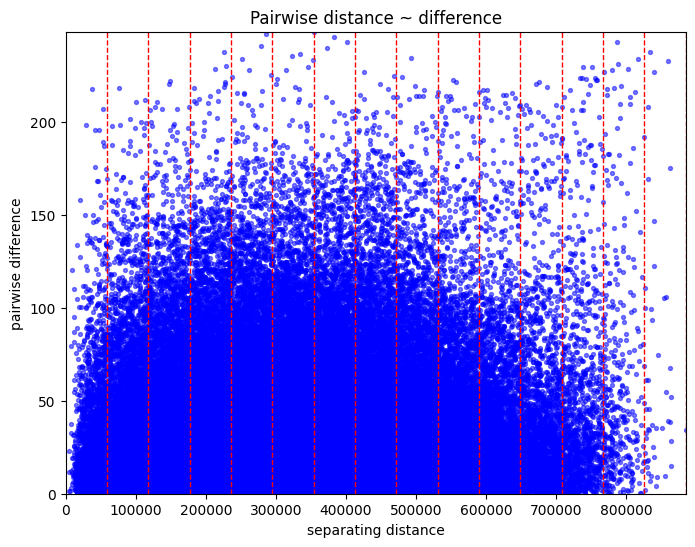

In [ ]:
import skgstat as skg

vario = skg.Variogram(coordinates, values, n_lags=15)

fig = vario.distance_difference_plot()

## Task 5.1 Create pairs

Next, we need to go for all pairs of coordinates and values and calculate their residuals.

In [ ]:
from math import sqrt
from tqdm import tqdm

dist_pairs = []
value_pairs = []

N = len(coordinates)

for i in tqdm(range(N)):
  for j in range(N):
    # if we are in the lower triange or the determinate, continue
    if i >= j:
      continue

    # otherwise, this is a pair
    # implement this!
    dist_pairs.append()

    value_pairs.append()

print(f"\nCalculated {len(dist_pairs)} pairwise residuals")

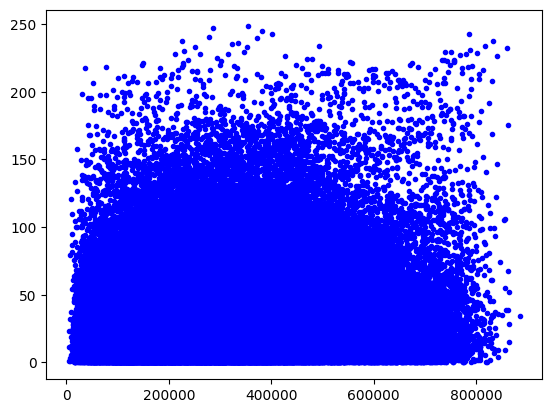

In [ ]:
import matplotlib.pyplot as plt

plt.plot(dist_pairs, value_pairs, '.b')

## TASK 5.2
Create a binning
Next we build a binning to group the pairs into equi-distant bins groups

In [ ]:
N = 15

minx = 0
maxx = max(dist_pairs)
step = (maxx - minx) / N

upper_edges = []

# implement the solution here


print(upper_edges)

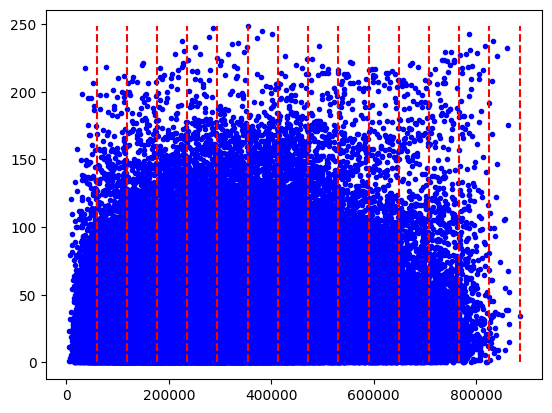

In [ ]:
import matplotlib.pyplot as plt

maxy = max(value_pairs)

plt.plot(dist_pairs, value_pairs, '.b')
plt.vlines(upper_edges, 0, maxy, colors='r', linestyles='--')

## 5.3 Bin distributions

Next, we separate the pairs for each bin, by storing their group index into a separate array of same size.

That makes it possible to easily use their index as a mask for the distance and value residual data

In [ ]:
# we switch to numpy here
import numpy as np

# we use -1 as an indicator for unassigned pairs
class_idx = np.ones(len(value_pairs)) * -1

# cast it to a numpy array
dist = np.asarray(dist_pairs)

# go for each edge
# set an index for each group

class_idx

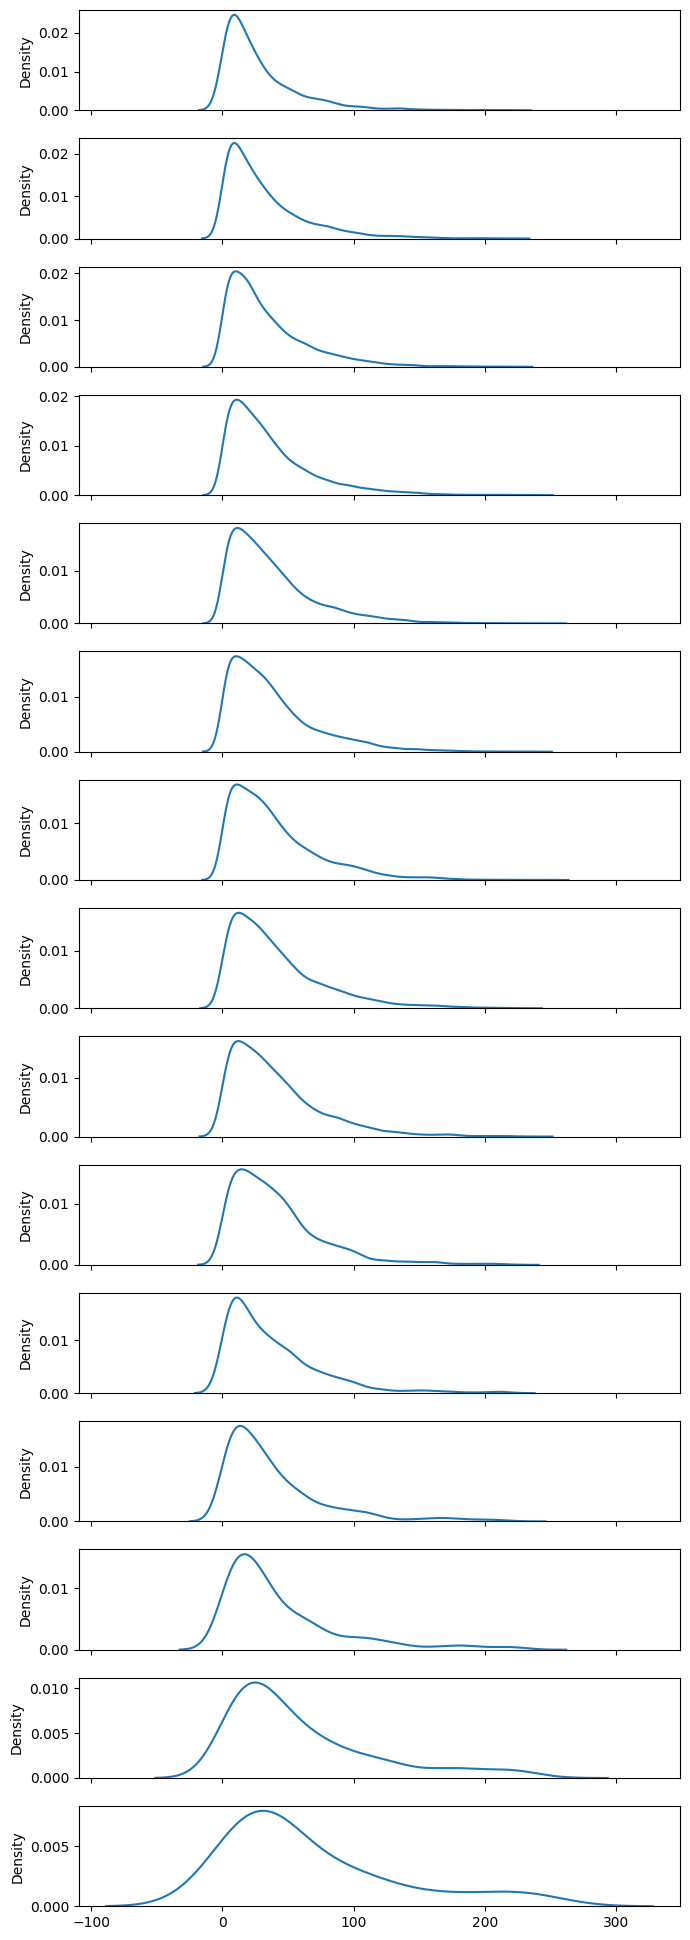

In [ ]:
# now these indices can be used to create histograms
import seaborn as sns

# cast tp numpy array
vals = np.asarray(value_pairs)

# create the figure
fig, _a = plt.subplots(N, 1, sharex=True, figsize=(7, N*1.3))
axes = _a.flatten()

# go for each bin
for bin_idx in range(N):
  sns.kdeplot(x=vals[class_idx == bin_idx], ax=axes[bin_idx])
plt.tight_layout()